# Finding peaks in data
Given a dataset, finding the peaks and estimate the peak size and width. We can find peaks using the scipy.signal.find_peaks function.

First, import the necessary packages:

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt

Load the data from a file. The input is a UV-vis absorption spectrum (taken from my Mini 1 project). The input is a 2D array with wavelength and absorption values.

In [ ]:
data_path = './raw_data/rdata_peak_finding.txt'
data = np.loadtxt(data_path)

We are interested in the peaks in the absorption data, so we select the second column from the data (index=1):

More info on the find_peaks function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

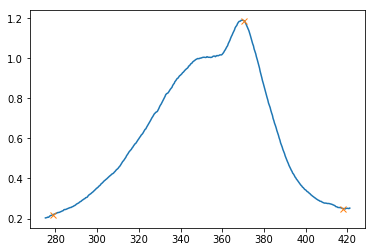

In [66]:
xval = data[0:400,0]
yval = data[0:400,1]

peaks = find_peaks_cwt(yval, np.arange(10,100))
#print(peaks)
plt.plot(xval, yval)
plt.plot(xval[peaks], yval[peaks], "x")
plt.show()

Model of two peaks fitting

In [85]:
from scipy.stats import norm
from scipy import optimize

def two_peaks(x,mean1,sd1, mag1, mean2,sd2,mag2):
    z1 = norm.pdf(x,mean1,sd1)*mag1
    z2 = norm.pdf(x,mean2,sd2)*mag2
    ztot = z1+z2
    return ztot

def one_peaks(x,mean1,sd1,mag1):
    z1 = mag1*norm.pdf(x,mean1,sd1)
    return z1

# params, params_covariance = optimize.curve_fit(one_peaks, xval, yval,
#                                                p0=[350, 200,10])
params, params_covariance = optimize.curve_fit(two_peaks, xval, yval,
                                               p0=[350, 200,10,380,10,1])
print(params)

[ 351.22127153   36.88711392   85.92553682  370.70589956    7.85081692
    7.01769148]


In [86]:
# zfit = one_peaks(xval, params[0],params[1],params[2])
zfit = two_peaks(xval, params[0],params[1],params[2],params[3],params[4],params[5])

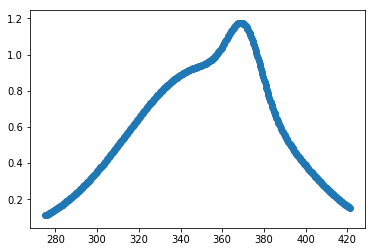

In [87]:
plt.scatter(xval,zfit)
plt.show()